# Project 3: Web APIs & NLP Part 4 Classification Models

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from skopt.space import Integer, Real, Categorical
from skopt import BayesSearchCV

In [2]:
combo=pd.read_csv('data2/combo.csv')

In [3]:
combo.head()

,selftext,author,title,subreddit,fulltext,tokenized_fulltext,lemmatized_tokenized_fulltext,stemmatized_lemmatized_tokenized_fulltext
0,if you happend to make a blog/ecommerce store ...,raygreeen,Asking for a friend,0,if you happend to make a blog/ecommerce store ...,"['if', 'you', 'happend', 'to', 'make', 'a', 'b...","['if', 'you', 'happend', 'to', 'make', 'a', 'b...",if you happend to make a blog ecommerc store a...
1,The floor is cold like it was that that night...,a_deceased_person,That Night 🌙,0,The floor is cold like it was that that night...,"['the', 'floor', 'is', 'cold', 'like', 'it', '...","['the', 'floor', 'is', 'cold', 'like', 'it', '...",the floor is cold like it wa that that night i...
2,In this factory of memories\n\nWe went our way...,Luxrayguy,Factory,0,In this factory of memories\n\nWe went our way...,"['in', 'this', 'factory', 'of', 'memories', 'w...","['in', 'this', 'factory', 'of', 'memory', 'we'...",in thi factori of memori we went our way for a...
3,I'm panicking I think. Shoving my mouth into m...,a_deceased_person,delusions?,0,I'm panicking I think. Shoving my mouth into m...,"[""i'm"", 'panicking', 'i', 'think', 'shoving', ...","[""i'm"", 'panicking', 'i', 'think', 'shoving', ...",i'm panick i think shove my mouth into my fist...
4,"“america no longer creates prophets, only prof...",bmodelic,Desolate America,0,"“america no longer creates prophets, only prof...","['america', 'no', 'longer', 'creates', 'prophe...","['america', 'no', 'longer', 'creates', 'prophe...",america no longer creat prophet onli profit am...


## Vectorizing Hyperparameters

## Creative Writing Features

In [4]:
# Creative Writing Subreddit
X=combo.loc[combo['subreddit']==0, 'stemmatized_lemmatized_tokenized_fulltext']
y=combo.loc[combo['subreddit']==0, 'subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
cv=CountVectorizer(stop_words='english', max_df=0.95, min_df=0.05, max_features=100, ngram_range=(1,5))
cv.fit(X_train)
X1_train = cv.transform(X_train)
X1_train_df = pd.DataFrame(X1_train.toarray(), columns = cv.get_feature_names())

In [5]:
X1_train_df.sum().sort_values(ascending=False).head(20)

wa       26758
hi       17548
thi      12783
like      9113
just      7723
look      6757
time      6334
know      6023
said      5863
want      5129
feel      4400
don       4224
day       4063
eye       4048
make      3980
onli      3834
love      3810
life      3764
way       3622
think     3506
dtype: int64

## Technical Support Features

In [6]:
# Creative Writing Subreddit
X=combo.loc[combo['subreddit']==1, 'stemmatized_lemmatized_tokenized_fulltext']
y=combo.loc[combo['subreddit']==1, 'subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
cv1=CountVectorizer(stop_words='english', max_df=0.95, min_df=0.05, max_features=100, ngram_range=(1,5))
cv1.fit(X_train)
X2_train = cv1.transform(X_train)
X2_train_df = pd.DataFrame(X2_train.toarray(), columns = cv1.get_feature_names())

In [7]:
X2_train_df.sum().sort_values(ascending=False).head(20)

wa        17982
thi       15331
gt        12097
work       9068
just       6615
time       5302
hi         5139
user       4779
comput     4377
need       4374
know       4140
use        3926
like       3874
day        3663
look       3484
don        3435
tri        3390
new        3379
ask        3299
phone      3236
dtype: int64

## Pipeline with Count Vectorizer Running Into A Multinomial Naive Bayes

In [8]:
combo.head()

,selftext,author,title,subreddit,fulltext,tokenized_fulltext,lemmatized_tokenized_fulltext,stemmatized_lemmatized_tokenized_fulltext
0,if you happend to make a blog/ecommerce store ...,raygreeen,Asking for a friend,0,if you happend to make a blog/ecommerce store ...,"['if', 'you', 'happend', 'to', 'make', 'a', 'b...","['if', 'you', 'happend', 'to', 'make', 'a', 'b...",if you happend to make a blog ecommerc store a...
1,The floor is cold like it was that that night...,a_deceased_person,That Night 🌙,0,The floor is cold like it was that that night...,"['the', 'floor', 'is', 'cold', 'like', 'it', '...","['the', 'floor', 'is', 'cold', 'like', 'it', '...",the floor is cold like it wa that that night i...
2,In this factory of memories\n\nWe went our way...,Luxrayguy,Factory,0,In this factory of memories\n\nWe went our way...,"['in', 'this', 'factory', 'of', 'memories', 'w...","['in', 'this', 'factory', 'of', 'memory', 'we'...",in thi factori of memori we went our way for a...
3,I'm panicking I think. Shoving my mouth into m...,a_deceased_person,delusions?,0,I'm panicking I think. Shoving my mouth into m...,"[""i'm"", 'panicking', 'i', 'think', 'shoving', ...","[""i'm"", 'panicking', 'i', 'think', 'shoving', ...",i'm panick i think shove my mouth into my fist...
4,"“america no longer creates prophets, only prof...",bmodelic,Desolate America,0,"“america no longer creates prophets, only prof...","['america', 'no', 'longer', 'creates', 'prophe...","['america', 'no', 'longer', 'creates', 'prophe...",america no longer creat prophet onli profit am...


In [9]:
# defining X and y and splitting into traintest sets
X=combo['stemmatized_lemmatized_tokenized_fulltext']
y=combo['subreddit']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.30, random_state=42)

In [10]:
# setting up pipeline and its parameters
# setting up pipeline and its parameters
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words='english', ngram_range = (1,3))),
    ('mnb', MultinomialNB())
])
bs_params = {
    'cv__max_features':Integer(1,10000)
}

In [11]:
# setting and fitting up bayessearchcv
bs = BayesSearchCV(estimator = pipe,
                     search_spaces = bs_params,
                     scoring = 'f1_weighted',
                     n_iter = 50,
                     cv = 5,
                     verbose = 1, n_jobs=-1,
                     random_state=42)
bs.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('cv',
                                         CountVectorizer(ngram_range=(1, 3),
                                                         stop_words='english')),
                                        ('mnb', MultinomialNB())]),
              n_jobs=-1, random_state=42, scoring='f1_weighted',
              search_spaces={'cv__max_features': Integer(low=1, high=10000, prior='uniform', transform='normalize')},
              verbose=1)

In [12]:
bs.best_score_

0.9814203101877574

In [13]:
bs.best_params_

OrderedDict([('cv__max_features', 10000)])

## Pipeline with TFIDF Vectorizer Running into a Multinomial Naive Bayes

In [14]:
# defining X and y and splitting into traintest sets
X=combo['stemmatized_lemmatized_tokenized_fulltext']
y=combo['subreddit']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.30, random_state=42)

In [15]:
# setting up pipeline and its parameters
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english', ngram_range = (1,3))),
    ('mnb', MultinomialNB())
])
bs_params2 = {
    'tvec__max_features':Integer(1,20000)}

In [16]:
# setting and fitting up bayessearchcv
bs2 = BayesSearchCV(estimator = pipe2,
                     search_spaces = bs_params2,
                     scoring = 'f1_weighted',
                     n_iter = 50,
                     cv = 5,
                     verbose = 1, n_jobs=-1,
                     random_state=42)
bs2.fit(X_train,y_train)

# check dis

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('tvec',
                                         TfidfVectorizer(ngram_range=(1, 3),
                                                         stop_words='english')),
                                        ('mnb', MultinomialNB())]),
              n_jobs=-1, random_state=42, scoring='f1_weighted',
              search_spaces={'tvec__max_features': Integer(low=1, high=20000, prior='uniform', transform='normalize')},
              verbose=1)

In [17]:
bs2.best_score_

0.9921781861058072

In [18]:
bs2.best_params_

OrderedDict([('tvec__max_features', 14681)])

In [19]:
# getting predictions and saving confusion matrix values
preds = bs2.predict(X_test)
tn,fp,fn,tp=confusion_matrix(y_test,preds).ravel()

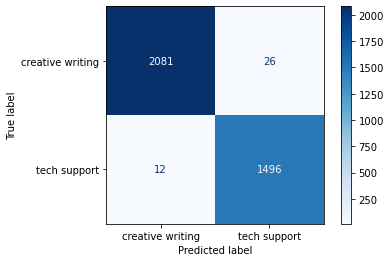

In [20]:
# viewing confusion matrix 
plot_confusion_matrix(bs2, X_test,y_test,cmap='Blues', display_labels=['creative writing','tech support']);

In [21]:
# calculating specificity 
spec=tn/(tn+fp)
print(f'Specificity is {spec}')

Specificity is 0.9876601803512103


In [22]:
# calculating precision 
precision=tp/(tp+fp)
print(f'Precision is {precision}')

Precision is 0.9829172141918529


In [23]:
print(classification_report(y_test, preds, target_names=['creative writing', 'tech support'], digits=3))

                  precision    recall  f1-score   support

creative writing      0.994     0.988     0.991      2107
    tech support      0.983     0.992     0.987      1508

        accuracy                          0.989      3615
       macro avg      0.989     0.990     0.989      3615
    weighted avg      0.990     0.989     0.989      3615

